In [1]:
# ============================== loading libraries ===========================================
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from prettytable import PrettyTable
import random
from scipy.stats import uniform
from sklearn.metrics import roc_curve, auc
from sklearn.learning_curve import validation_curve
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import precision_score, recall_score,roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import joblib
from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model
from scipy import stats
import scikitplot as skplt
from wordcloud import WordCloud, STOPWORDS 

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

#import nltk
#nltk.download('stopwords')

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#from gensim.models import KeyedVectors
#model = KeyedVectors.load_word2vec_format(‘GoogleNews-vectors-negative300.bin.gz’,binary=True)

#import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.decomposition import TruncatedSVD
from sklearn import tree
import graphviz 

import xgboost as xgb

# =============================================================================================

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
fileObject = open("./train_to_file.pkl",'rb') # we open the file for reading 
X_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_cv_to_file.pkl",'rb') # we open the file for reading 
X_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./x_test_to_file.pkl",'rb') # we open the file for reading 
X_test = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_train_to_file.pkl",'rb') # we open the file for reading 
y_train = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_cv_to_file.pkl",'rb') # we open the file for reading 
y_cv = pickle.load(fileObject) # load the object from the file

fileObject = open("./y_test_to_file.pkl",'rb') # we open the file for reading 
y_test = pickle.load(fileObject) # load the object from the file

## BoW

In [3]:
#Appling BoW to fit and transform
count_vect =  CountVectorizer()
bow_NB = count_vect.fit(X_train[:,9])
train_bow_nstd = count_vect.transform(X_train[:,9])
cv_bow_nstd = count_vect.transform(X_cv[:,9]) 
test_bow_nstd = count_vect.transform(X_test[:,9]) 

print("the type of count vectorizer ",type(train_bow_nstd))
print("the number of unique words ", test_bow_nstd.get_shape()[1])

print(train_bow_nstd.shape)
print(cv_bow_nstd.shape)
print(test_bow_nstd.shape)
print(y_train.shape)
print(y_cv.shape)
print(y_test.shape)

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  37996
(38400, 37996)
(9600, 37996)
(12000, 37996)
(38400,)
(9600,)
(12000,)


In [4]:
# Column Standardization of the BoW non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_bow_nstd)
train_bow = std_scal.transform(train_bow_nstd)
cv_bow = std_scal.transform(cv_bow_nstd)
test_bow = std_scal.transform(test_bow_nstd)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## TF-IDF

In [12]:
#tf-idf on train data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,1)) #considering only uni-gram as I was getting memory error
train_tf_idf_nstd = tf_idf_vect.fit_transform(X_train[:,9]) #sparse matrix
cv_tfidf_nstd = tf_idf_vect.transform(X_cv[:,9])
test_tfidf_nstd = tf_idf_vect.transform(X_test[:,9])
print(train_tf_idf_nstd.shape)
print(cv_tfidf_nstd.shape)
print(test_tfidf_nstd.shape)

(38400, 37996)
(9600, 37996)
(12000, 37996)


In [13]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(train_tf_idf_nstd)
train_tfidf = std_scal.transform(train_tf_idf_nstd)
cv_tfidf = std_scal.transform(cv_tfidf_nstd)
test_tfidf = std_scal.transform(test_tfidf_nstd)

## Avg W2V

In [26]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [27]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [28]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [29]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
#print(len(sent_vectors[0]))
print(type(sent_vectors))

60000
<class 'list'>


In [30]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [31]:
X_train_nstd = X[0:38400:1]
X_cv_nstd = X[38400:48000:1]
X_test_nstd = X[48000:60000:1]

y_train_nstd = y[0:38400:1]
y_cv_nstd = y[38400:48000:1]
y_test_nstd =y[48000:60000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(38400, 50)
(9600, 50)
(12000, 50)
(38400,)
(9600,)
(12000,)


In [32]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_avgw2v = std_scal.transform(X_train_nstd)
cv_avgw2v = std_scal.transform(X_cv_nstd)
test_avgw2v = std_scal.transform(X_test_nstd)

## tfidf-W-w2v

In [46]:
fileObject = open("./final_to_file2.pkl",'rb') # we open the file for reading 
final = pickle.load(fileObject) # load the object from the file

In [47]:
#w2v
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())
    
print(type(list_of_sent))
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

<class 'list'>
witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']


In [48]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [49]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(final['CleanedText'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [50]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in (list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [51]:
print(len(tfidf_sent_vectors))
print(np.shape(tfidf_sent_vectors))
print(type(tfidf_sent_vectors))

60000
(60000, 50)
<class 'list'>


In [52]:
# create design matrix X and target vector y
X = np.array(sent_vectors[::]) # end index is exclusive
y = np.array(final['Score']) # showing you two ways of indexing a pandas df

In [53]:
X_train_nstd = X[0:38400:1]
X_cv_nstd = X[38400:48000:1]
X_test_nstd = X[48000:60000:1]

y_train_nstd = y[0:38400:1]
y_cv_nstd = y[38400:48000:1]
y_test_nstd =y[48000:60000:1]

print(X_train_nstd.shape)
print(X_cv_nstd.shape)
print(X_test_nstd.shape)
print(y_train_nstd.shape)
print(y_cv_nstd.shape)
print(y_test_nstd.shape)

(38400, 50)
(9600, 50)
(12000, 50)
(38400,)
(9600,)
(12000,)


In [54]:
# Column Standardization of the tfidf non-standard vector
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_nstd)
train_tfidfww2v = std_scal.transform(X_train_nstd)
cv_tfidfww2v = std_scal.transform(X_cv_nstd)
test_tfidfww2v = std_scal.transform(X_test_nstd)

## Random Forest on BoW 

In [26]:
clf_rf = RandomForestClassifier()
clf_rf.fit(train_bow,y_train)
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Max-depth tuning

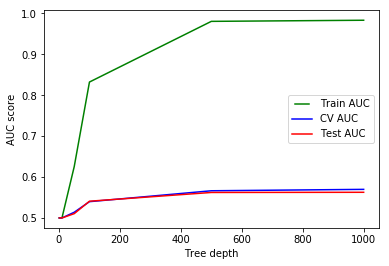

In [22]:
max_depths = [1, 5, 10, 50, 100, 500, 1000]
train_results = []
cv_results = []
test_results = []
for max_depth in max_depths:
    clf_rf_md = RandomForestClassifier(max_depth=max_depth)
    clf_rf_md.fit(train_bow, y_train)
    train_pred = clf_rf_md.predict(train_bow)
    
    fpr_tr, tpr_tr, thrsh_trn = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr_tr, tpr_tr)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    #train_results
    
    cv_pred = clf_rf_md.predict(cv_bow)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
    test_pred = clf_rf_md.predict(test_bow)

    fpr_test, tpr_test, thrsh_test = roc_curve(y_test, test_pred)
    roc_auc = auc(fpr_test, tpr_test)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    #test_results
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'g', label="Train AUC")
line2, = plt.plot(max_depths, cv_results, 'b', label="CV AUC")
line3, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [24]:
print(train_results)
print("\n",cv_results)
print("\n",test_results)

[0.5, 0.5, 0.5007087172218285, 0.6254283142600721, 0.8322263554898784, 0.9805991279295465, 0.9833305112834598]

 [0.5, 0.5, 0.5, 0.5138482121462233, 0.5397457999414255, 0.566378897201736, 0.5698143254612742]

 [0.5, 0.5, 0.5, 0.5104012983937196, 0.5408362459361117, 0.5622176039796629, 0.5626619275569303]


In [25]:
test_results_hmap_bow_1 = test_results
joblib.dump(test_results_hmap_bow_1,"test_results_hmap_bow_1.pkl")

['test_results_hmap_bow_1.pkl']

In [26]:
test_results_hmap_bow_1 = joblib.load("test_results_hmap_bow_1.pkl")
test_results_hmap_bow_1

[0.5,
 0.5,
 0.5,
 0.5104012983937196,
 0.5408362459361117,
 0.5622176039796629,
 0.5626619275569303]

## n_estimators tuning

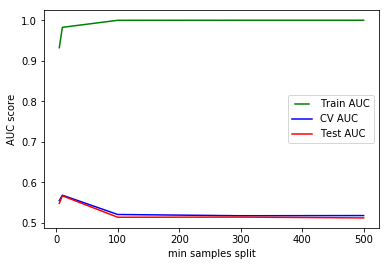

In [5]:
n_estimators_splits = [5, 10, 100, 300, 500]
train_results = []
cv_results = []
test_results = []
for n_estimators_split in n_estimators_splits:
    clf_rf_nest = RandomForestClassifier(n_estimators=n_estimators_split)
    clf_rf_nest.fit(train_bow, y_train)
    
    train_pred = clf_rf_nest.predict(train_bow)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    cv_pred = clf_rf_nest.predict(cv_bow)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    cv_results.append(roc_auc)
    
    y_pred = clf_rf_nest.predict(test_bow)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_splits, train_results, 'g', label="Train AUC")
line2, = plt.plot(n_estimators_splits, cv_results, 'b', label="CV AUC")
line3, = plt.plot(n_estimators_splits, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [6]:
print(train_results)
print("\n",cv_results)
print("\n",test_results)

[0.9322025283036253, 0.9824744065175185, 0.9998818804630285, 1.0, 1.0]

 [0.5544834460448893, 0.56790898985596, 0.5202464788732395, 0.5171654929577465, 0.5176056338028169]

 [0.5477231973047872, 0.5663640259637733, 0.5134770889487871, 0.5138140161725067, 0.5117924528301887]


In [8]:
test_results_nest_bow_2 = test_results
joblib.dump(test_results_nest_bow_2,"test_results_nest_bow_2.pkl")

['test_results_nest_bow_2.pkl']

In [9]:
test_results_nest_bow_2 = joblib.load("test_results_nest_bow_2.pkl")
test_results_nest_bow_2

[0.5477231973047872,
 0.5663640259637733,
 0.5134770889487871,
 0.5138140161725067,
 0.5117924528301887]

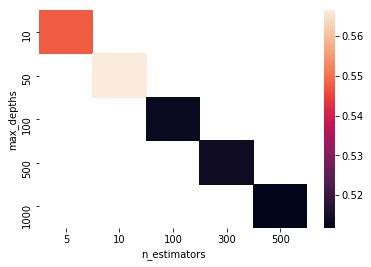

In [10]:
X = [10, 50, 100, 500, 1000]
Y = [5, 10, 100, 300, 500]
Z = test_results_nest_bow_2
data = pd.DataFrame({'max_depths': X, 'n_estimators': Y, 'AUC': Z})
data_pivoted = data.pivot("max_depths", "n_estimators", "AUC")
ax = sns.heatmap(data_pivoted)
plt.show()

## Random Forest with best parameters

In [39]:
clf_rf_best = RandomForestClassifier(n_estimators=5, max_depth=1000)
clf_rf_best.fit(train_bow, y_train)

rf_test_pred_best = clf_rf_best.predict(test_bow)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred_best)
roc_auc_rf_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_rf_best,"clf_rf_best.pkl")
joblib.dump(rf_test_pred_best,"rf_test_pred_best.pkl")
joblib.dump(roc_auc_rf_best,"roc_auc_rf_best.pkl")

['roc_auc_rf_best.pkl']

In [7]:
clf_rf_best = joblib.load("clf_rf_best.pkl")
rf_test_pred_best = joblib.load("rf_test_pred_best.pkl")
roc_auc_rf_best = joblib.load("roc_auc_rf_best.pkl")
roc_auc_rf_best

0.557454742305141

In [6]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_bow = confusion_matrix(y_test, rf_test_pred_best)
cm_bow

array([[  190,  1294],
       [  138, 10378]], dtype=int64)

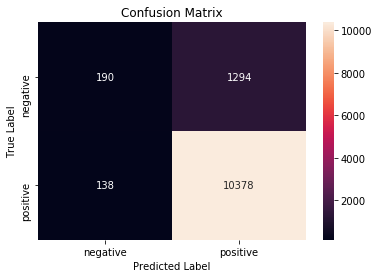

In [7]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [51]:
y_pred_train_proba = clf_rf_best.predict_proba(train_bow)
y_pred_cv_proba = clf_rf_best.predict_proba(cv_bow)
y_pred_test_proba = clf_rf_best.predict_proba(test_bow)

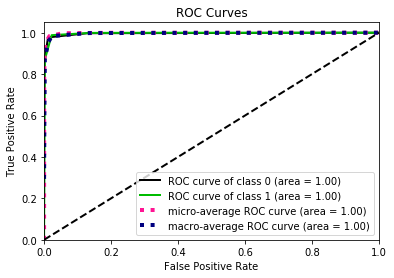

In [44]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba)

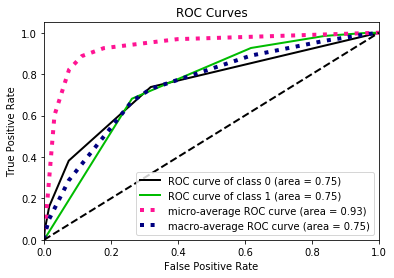

In [52]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba)

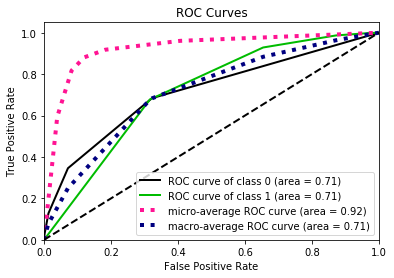

In [45]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba)

In [13]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_importances_, feature_names))[:n]
    topn_class2 = sorted(zip(classifier.feature_importances_, feature_names))[-n:]
    #print(dict(zip(iris_pd.columns, clf.feature_importances_)))
    
    print("Class 0: Negatives ")
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print("\n")
    print("Class 1: Positives ")
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

    return topn_class1, topn_class2

topn_class1, topn_class2 = most_informative_feature_for_binary_classification(count_vect, clf_rf_best)

Class 0: Negatives 
0 0.0 0000
0 0.0 0002251337
0 0.0 000kwh
0 0.0 000s
0 0.0 00100
0 0.0 00493
0 0.0 00703
0 0.0 00704
0 0.0 0071499849
0 0.0 00am
0 0.0 00pm
0 0.0 01
0 0.0 01317
0 0.0 01318
0 0.0 0188
0 0.0 03510
0 0.0 04
0 0.0 040
0 0.0 0451155505
0 0.0 04830


Class 1: Positives 
1 0.006464756664894693 horrible
1 0.006344989452627727 not
1 0.006296199356599379 threw
1 0.005714733120633534 the
1 0.005411848461667918 worst
1 0.005111784712554101 waste
1 0.004806677584199558 great
1 0.00458570035621741 and
1 0.004336409336054188 disappointed
1 0.004327732434471427 it
1 0.004253828779103582 awful
1 0.004221493912713712 to
1 0.003988319303083825 disappointment
1 0.003957576836128013 this
1 0.003948889941997886 terrible
1 0.0037895785950280377 is
1 0.0036764848713530503 of
1 0.003597981861716877 in
1 0.0035523088844358897 money
1 0.003544583353870712 love


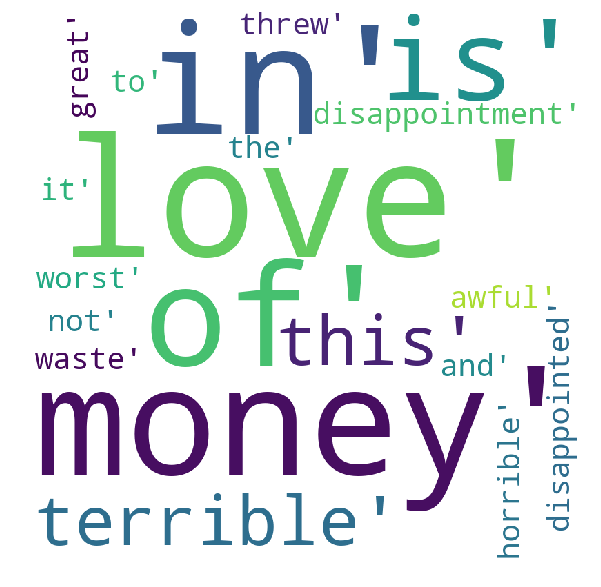

In [14]:
#source: https://www.geeksforgeeks.org/generating-word-cloud-python/
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in topn_class2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Random Forest on tfidf

In [18]:
clf_rf_tfidf = RandomForestClassifier()
clf_rf_tfidf.fit(train_tfidf,y_train)
clf_rf_tfidf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Max-depth tuning

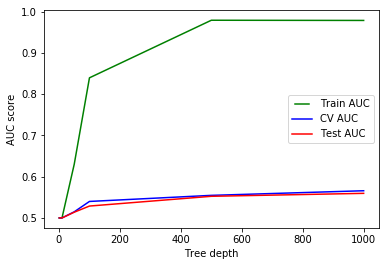

In [14]:
max_depths = [1, 5, 10, 50, 100, 500, 1000]
train_results_tfidf = []
cv_results_tfidf = []
test_results_tfidf = []

for max_depth in max_depths:
    clf_rf_tfidf_md = RandomForestClassifier(max_depth=max_depth)
    clf_rf_tfidf_md.fit(train_tfidf, y_train)
    train_pred_tfidf = clf_rf_tfidf_md.predict(train_tfidf)
    
    fpr_tr, tpr_tr, thrsh_trn = roc_curve(y_train, train_pred_tfidf)
    roc_auc_tfidf_md = auc(fpr_tr, tpr_tr)
    # Add auc score to previous train results
    train_results_tfidf.append(roc_auc_tfidf_md)
    #train_results
    
    
    cv_pred = clf_rf_tfidf_md.predict(cv_tfidf)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, cv_pred)
    roc_auc_tfidf_md = auc(false_positive_rate, true_positive_rate)
    cv_results_tfidf.append(roc_auc_tfidf_md)
    
    
    test_pred_tfidf = clf_rf_tfidf_md.predict(test_tfidf)
    
    fpr_test, tpr_test, thrsh_test = roc_curve(y_test, test_pred_tfidf)
    roc_auc_tfidf_md = auc(fpr_test, tpr_test)
    # Add auc score to previous test results
    test_results_tfidf.append(roc_auc_tfidf_md)
    #test_results
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_tfidf, 'g', label="Train AUC")
line2, = plt.plot(max_depths, cv_results_tfidf, 'b', label="CV AUC")
line3, = plt.plot(max_depths, test_results_tfidf, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [15]:
print(train_results_tfidf)
print("\n",cv_results_tfidf)
print("\n",test_results_tfidf)

[0.5, 0.5, 0.5003543586109143, 0.630049610205528, 0.8395936687928183, 0.9791670594823187, 0.9786945813344332]

 [0.5, 0.5, 0.5, 0.5147875675603717, 0.5399288452834208, 0.5546781397268298, 0.565858882025613]

 [0.5, 0.5, 0.5, 0.5138181172265801, 0.5287544124778671, 0.5523950668420551, 0.5595697327855692]


In [17]:
test_results_hmap_tfidf_1 = test_results_tfidf
joblib.dump(test_results_hmap_tfidf_1,"test_results_hmap_tfidf_1.pkl")

['test_results_hmap_tfidf_1.pkl']

In [18]:
test_results_hmap_tfidf_1 = joblib.load("test_results_hmap_tfidf_1.pkl")
test_results_hmap_tfidf_1

[0.5,
 0.5,
 0.5,
 0.5138181172265801,
 0.5287544124778671,
 0.5523950668420551,
 0.5595697327855692]

## n_estimator tuning 

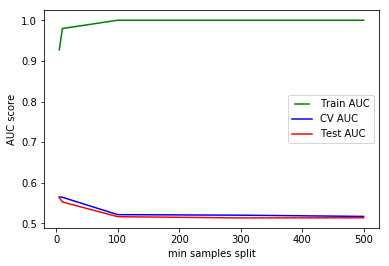

In [19]:
n_estimators_splits = [5, 10, 100, 300, 500]
train_results_tfidf = []
cv_results_tfidf = []
test_results_tfidf = []
for n_estimators_split in n_estimators_splits:
    clf_dtree_nest_tfidf = RandomForestClassifier(n_estimators=n_estimators_split)
    clf_dtree_nest_tfidf.fit(train_tfidf, y_train)
    
    train_pred_tfidf = clf_dtree_nest_tfidf.predict(train_tfidf)  
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_tfidf)
    roc_auc_train_tfidf = auc(false_positive_rate, true_positive_rate)
    train_results_tfidf.append(roc_auc_train_tfidf)
    
    
    cv_pred_tfidf = clf_dtree_nest_tfidf.predict(cv_tfidf)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, cv_pred_tfidf)
    roc_auc_cv_tfidf = auc(false_positive_rate, true_positive_rate)
    cv_results_tfidf.append(roc_auc_cv_tfidf)
    
    
    y_pred_tfidf = clf_dtree_nest_tfidf.predict(test_tfidf)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_tfidf)
    roc_auc_test_tfidf = auc(false_positive_rate, true_positive_rate)
    test_results_tfidf.append(roc_auc_test_tfidf)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_splits, train_results_tfidf, 'g', label="Train AUC")
line2, = plt.plot(n_estimators_splits, cv_results_tfidf, 'b', label="CV AUC")
line3, = plt.plot(n_estimators_splits, test_results_tfidf, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [20]:
print(train_results_tfidf)
print("\n",cv_results_tfidf)
print("\n",test_results_tfidf)

[0.9270042211684771, 0.9796395376302044, 1.0, 1.0, 1.0]

 [0.5649078782715194, 0.564275539817354, 0.5215078276844431, 0.5201874051492319, 0.5171654929577465]

 [0.5633128417331464, 0.5526885485241845, 0.5165094339622642, 0.5134770889487871, 0.5138140161725067]


In [22]:
test_results_hmap_tfidf_2 = test_results_tfidf
joblib.dump(test_results_hmap_tfidf_2,"test_results_hmap_tfidf_2.pkl")

['test_results_hmap_tfidf_2.pkl']

In [23]:
test_results_hmap_tfidf_2 = joblib.load("test_results_hmap_tfidf_2.pkl")
test_results_hmap_tfidf_2

[0.5633128417331464,
 0.5526885485241845,
 0.5165094339622642,
 0.5134770889487871,
 0.5138140161725067]

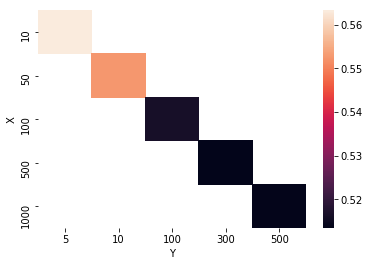

In [24]:
X = [10, 50, 100, 500, 1000]
Y = n_estimators_splits
Z = test_results_hmap_tfidf_2
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

## Random Forest with best parameters on tfidf

In [26]:
clf_rf_best_tfidf = RandomForestClassifier(n_estimators=5, max_depth=1000) 
clf_rf_best_tfidf.fit(train_tfidf, y_train)

rf_test_pred_best_tfidf = clf_rf_best_tfidf.predict(test_tfidf)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred_best_tfidf)
roc_auc_rf_best_tfidf = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_rf_best_tfidf,"clf_rf_best_tfidf.pkl")
joblib.dump(rf_test_pred_best_tfidf,"rf_test_pred_best_tfidf.pkl")
joblib.dump(roc_auc_rf_best_tfidf,"roc_auc_rf_best_tfidf.pkl")

['roc_auc_rf_best_tfidf.pkl']

In [27]:
clf_rf_best_tfidf = joblib.load("clf_rf_best_tfidf.pkl")
rf_test_pred_best_tfidf = joblib.load("rf_test_pred_best_tfidf.pkl")
roc_auc_rf_best_tfidf = joblib.load("roc_auc_rf_best_tfidf.pkl")
roc_auc_rf_best_tfidf

0.5569669731862832

In [28]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidf = confusion_matrix(y_test, rf_test_pred_best_tfidf)
cm_tfidf

array([[  187,  1297],
       [  127, 10389]], dtype=int64)

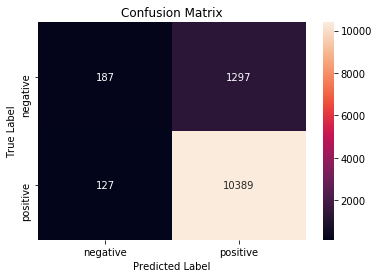

In [29]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
y_pred_train_proba_tfidf = clf_rf_best_tfidf.predict_proba(train_tfidf)
y_pred_cv_proba_tfidf = clf_rf_best_tfidf.predict_proba(cv_tfidf)
y_pred_test_proba_tfidf = clf_rf_best_tfidf.predict_proba(test_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


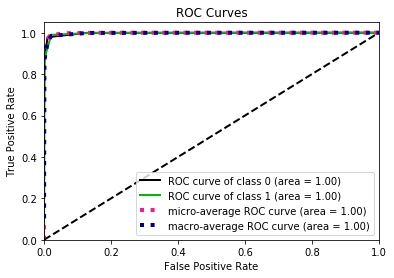

In [31]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


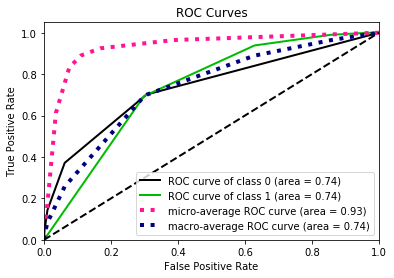

In [32]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba_tfidf)

C:\Users\AbhiShek\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


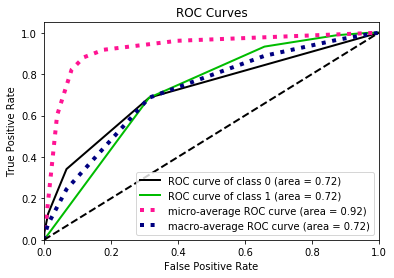

In [33]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_tfidf)

In [34]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.feature_importances_, feature_names))[:n]
    topn_class2 = sorted(zip(classifier.feature_importances_, feature_names))[-n:]
    #print(dict(zip(iris_pd.columns, clf.feature_importances_)))
    
    print("Class 0: Negatives ")
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print("\n")
    print("Class 1: Positives ")
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

    return topn_class1, topn_class2

topn_class1, topn_class2 = most_informative_feature_for_binary_classification(tf_idf_vect, clf_rf_best_tfidf)

Class 0: Negatives 
0 0.0 0000
0 0.0 0002251337
0 0.0 000kwh
0 0.0 000s
0 0.0 00100
0 0.0 00493
0 0.0 00703
0 0.0 00704
0 0.0 0071499849
0 0.0 00am
0 0.0 00pm
0 0.0 01
0 0.0 01317
0 0.0 01318
0 0.0 0188
0 0.0 02
0 0.0 03
0 0.0 03510
0 0.0 040
0 0.0 0451155505


Class 1: Positives 
1 0.009282769794714003 not
1 0.006555962434710588 worst
1 0.005716172801675299 refund
1 0.005439548152300956 waste
1 0.005265606089995259 horrible
1 0.004880998727353923 and
1 0.004809270837563668 but
1 0.0047917003443453355 stale
1 0.004633933066295158 best
1 0.004579498578241138 the
1 0.00420107490047982 threw
1 0.0041973357019790295 awful
1 0.003978878647139356 was
1 0.003932286961871653 is
1 0.003791469366952388 in
1 0.0037094673904496805 to
1 0.003613197043892577 disappointing
1 0.0035467393341620775 of
1 0.0035152110371905257 my
1 0.003508831865443538 it


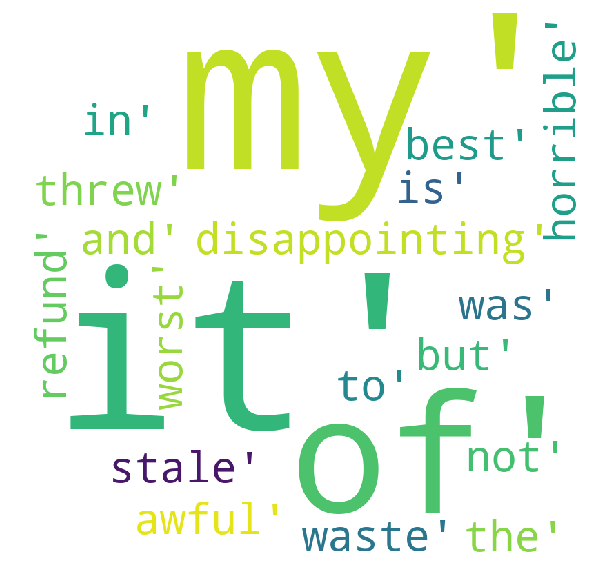

In [35]:
#source: https://www.geeksforgeeks.org/generating-word-cloud-python/
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in topn_class2: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Random Forest on avgW2V

In [46]:
clf_rf_avgw2v = RandomForestClassifier()
clf_rf_avgw2v.fit(train_avgw2v,y_train)
clf_rf_avgw2v

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## max_depth tuning

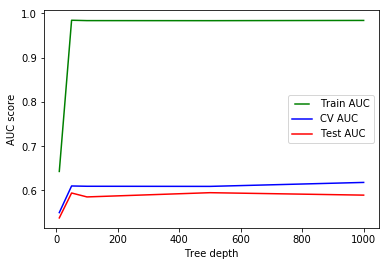

In [33]:
max_depths = [10, 50, 100, 500, 1000]

train_results_avgw2v = []
cv_results_avgw2v = []
test_results_avgw2v = []

for max_depth in max_depths:
    clf_rf_avgw2v_md = RandomForestClassifier(max_depth=max_depth)
    clf_rf_avgw2v_md.fit(train_avgw2v, y_train)
    train_pred_avgw2v = clf_rf_avgw2v_md.predict(train_avgw2v)
    
    fpr_tr, tpr_tr, thrsh_trn = roc_curve(y_train, train_pred_avgw2v)
    roc_auc_train_avgw2v = auc(fpr_tr, tpr_tr)
    # Add auc score to previous train results
    train_results_avgw2v.append(roc_auc_train_avgw2v)
    #train_results
    
        
    cv_pred_avgw2v = clf_rf_avgw2v_md.predict(cv_avgw2v)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, cv_pred_avgw2v)
    roc_auc_avgw2v_md = auc(false_positive_rate, true_positive_rate)
    cv_results_avgw2v.append(roc_auc_avgw2v_md)
    
    
    test_pred_avgw2v = clf_rf_avgw2v_md.predict(test_avgw2v)

    fpr_test, tpr_test, thrsh_test = roc_curve(y_test, test_pred_avgw2v)
    roc_auc_test_avgw2v = auc(fpr_test, tpr_test)
    # Add auc score to previous test results
    test_results_avgw2v.append(roc_auc_test_avgw2v)
    #test_results
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_avgw2v, 'g', label="Train AUC")
line2, = plt.plot(max_depths, cv_results_avgw2v, 'b', label="CV AUC")
line3, = plt.plot(max_depths, test_results_avgw2v, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [34]:
print(train_results_avgw2v)
print("\n",cv_results_avgw2v)
print("\n",test_results_avgw2v)

[0.642869246246347, 0.984720772736787, 0.983893935977987, 0.983761182437445, 0.9842786101044486]

 [0.5497833408770202, 0.6099977701749248, 0.6093213344338242, 0.6090584147607764, 0.61801182805719]

 [0.5377645564351178, 0.5940945846606225, 0.5852352825985099, 0.5948077835955787, 0.589278409283146]


In [37]:
test_results_hmap_avgw2v_1 = test_results_avgw2v
joblib.dump(test_results_hmap_avgw2v_1,"test_results_hmap_avgw2v_1.pkl")

['test_results_hmap_avgw2v_1.pkl']

In [38]:
test_results_hmap_avgw2v_1 = joblib.load("test_results_hmap_avgw2v_1.pkl")
test_results_hmap_avgw2v_1

[0.5377645564351178,
 0.5940945846606225,
 0.5852352825985099,
 0.5948077835955787,
 0.589278409283146]

## n_estimator tuning

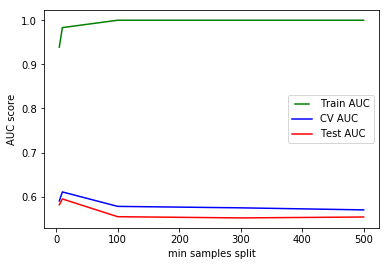

In [39]:
n_estimators_splits = [5, 10, 100, 300, 500]

train_results_avgw2v = []
cv_results_avgw2v = []
test_results_avgw2v = []

for n_estimators_split in n_estimators_splits:
    clf_rf_avgw2v_nest = RandomForestClassifier(n_estimators=n_estimators_split)
    clf_rf_avgw2v_nest.fit(train_avgw2v, y_train)
    
    train_pred_avgw2v = clf_rf_avgw2v_nest.predict(train_avgw2v)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_avgw2v)
    roc_auc_avgw2v = auc(false_positive_rate, true_positive_rate)
    train_results_avgw2v.append(roc_auc_avgw2v)
    
    
    cv_pred_avgw2v = clf_rf_avgw2v_nest.predict(cv_avgw2v)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred_avgw2v)
    roc_auc_avgw2v = auc(false_positive_rate, true_positive_rate)
    cv_results_avgw2v.append(roc_auc_avgw2v)
    
    
    y_pred_avgw2v = clf_rf_avgw2v_nest.predict(test_avgw2v)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_avgw2v)
    roc_auc_avgw2v = auc(false_positive_rate, true_positive_rate)
    test_results_avgw2v.append(roc_auc_avgw2v)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_splits, train_results_avgw2v, 'g', label="Train AUC")
line2, = plt.plot(n_estimators_splits, cv_results_avgw2v, 'b', label="CV AUC")
line3, = plt.plot(n_estimators_splits, test_results_avgw2v, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [40]:
print(train_results_avgw2v)
print("\n",cv_results_avgw2v)
print("\n",test_results_avgw2v)

[0.939030478491261, 0.98330333829313, 1.0, 1.0, 1.0]

 [0.5901148859128305, 0.6105560584680103, 0.5777751337895045, 0.5744903019249714, 0.5698525985782369]

 [0.5814110496750426, 0.5946257993210705, 0.5543772856968563, 0.5516261192032883, 0.55369522914127]


In [42]:
test_results_hmap_avgw2v_2 = test_results_avgw2v
joblib.dump(test_results_hmap_avgw2v_2,"test_results_hmap_avgw2v_2.pkl")

['test_results_hmap_avgw2v_2.pkl']

In [43]:
test_results_hmap_avgw2v_2 = joblib.load("test_results_hmap_avgw2v_2.pkl")
test_results_hmap_avgw2v_2

[0.5814110496750426,
 0.5946257993210705,
 0.5543772856968563,
 0.5516261192032883,
 0.55369522914127]

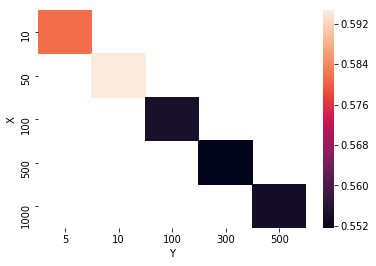

In [44]:
X = [10, 50, 100, 500, 1000]
Y = n_estimators_splits
Z = test_results_hmap_avgw2v_2
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

## Random Forest with best parameters on avgW2V

In [51]:
clf_rf_avgw2v_best = RandomForestClassifier(n_estimators=10, max_depth=50)
clf_rf_avgw2v_best.fit(train_avgw2v, y_train)

rf_test_pred_avgw2v_best = clf_rf_avgw2v_best.predict(test_avgw2v)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred_avgw2v_best)
roc_auc_rf_avgw2v_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_rf_avgw2v_best,"clf_rf_avgw2v_best.pkl")
joblib.dump(rf_test_pred_avgw2v_best,"rf_test_pred_avgw2v_best.pkl")
joblib.dump(roc_auc_rf_avgw2v_best,"roc_auc_rf_avgw2v_best.pkl")

['roc_auc_rf_avgw2v_best.pkl']

In [52]:
clf_rf_avgw2v_best = joblib.load("clf_rf_avgw2v_best.pkl")
rf_test_pred_avgw2v_best = joblib.load("rf_test_pred_avgw2v_best.pkl")
roc_auc_rf_avgw2v_best = joblib.load("roc_auc_rf_avgw2v_best.pkl")
roc_auc_rf_avgw2v_best

0.6076397254754404

In [53]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_avgw2v = confusion_matrix(y_test, rf_test_pred_avgw2v_best)
cm_avgw2v

array([[  358,  1126],
       [  273, 10243]], dtype=int64)

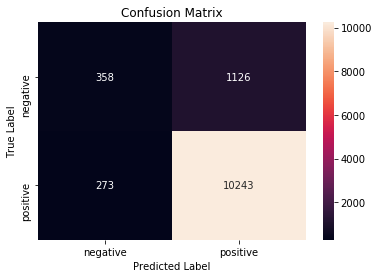

In [54]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [55]:
y_pred_train_avgw2v_proba = clf_rf_avgw2v_best.predict_proba(train_avgw2v)
y_pred_cv_avgw2v_proba = clf_rf_avgw2v_best.predict_proba(cv_avgw2v)
y_pred_test_avgw2v_proba = clf_rf_avgw2v_best.predict_proba(test_avgw2v)

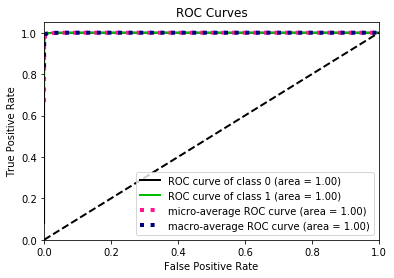

In [56]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_avgw2v_proba)

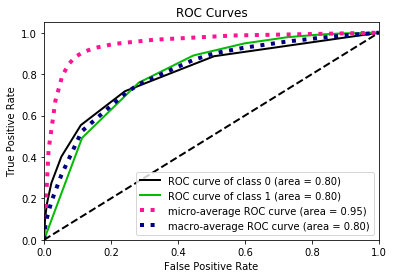

In [57]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_avgw2v_proba)

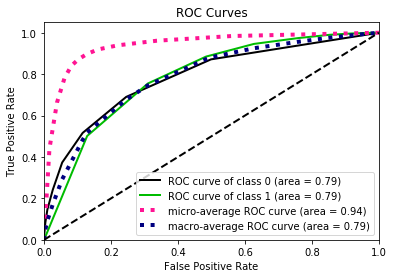

In [58]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_avgw2v_proba)

## Random Forest on tfidf-W-w2v

## max_depth tuning

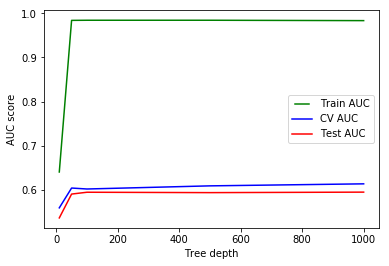

In [55]:
max_depths = [10, 50, 100, 500, 1000]

train_results_tfidfww2v = []
cv_results_tfidfww2v = []
test_results_tfidfww2v = []

for max_depth in max_depths:
    clf_rf_tfidfww2v_md = RandomForestClassifier(max_depth=max_depth)
    clf_rf_tfidfww2v_md.fit(train_tfidfww2v, y_train)
    train_pred_tfidfww2v = clf_rf_tfidfww2v_md.predict(train_tfidfww2v)
    
    fpr_tr, tpr_tr, thrsh_trn = roc_curve(y_train, train_pred_tfidfww2v)
    roc_auc_train_tfidfww2v = auc(fpr_tr, tpr_tr)
    # Add auc score to previous train results
    train_results_tfidfww2v.append(roc_auc_train_tfidfww2v)
    #train_results
    
    
    cv_pred_tfidfww2v = clf_rf_tfidfww2v_md.predict(cv_tfidfww2v)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, cv_pred_tfidfww2v)
    roc_auc_tfidfww2v_md = auc(false_positive_rate, true_positive_rate)
    cv_results_tfidfww2v.append(roc_auc_tfidfww2v_md)
    
    
    test_pred_tfidfww2v = clf_rf_tfidfww2v_md.predict(test_tfidfww2v)

    fpr_test, tpr_test, thrsh_test = roc_curve(y_test, test_pred_tfidfww2v)
    roc_auc_test_tfidfww2v = auc(fpr_test, tpr_test)
    # Add auc score to previous test results
    test_results_tfidfww2v.append(roc_auc_test_tfidfww2v)
    #test_results
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results_tfidfww2v, 'g', label="Train AUC")
line2, = plt.plot(max_depths, cv_results_tfidfww2v, 'b', label="CV AUC")
line3, = plt.plot(max_depths, test_results_tfidfww2v, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [56]:
print(train_results_tfidfww2v)
print("\n",cv_results_tfidfww2v)
print("\n",test_results_tfidfww2v)

[0.6403897834783531, 0.9837758164410156, 0.9840559575256705, 0.9840705915292413, 0.9831998527597292]

 [0.5591710708485317, 0.6040396442929791, 0.6018655648446444, 0.6089727162597514, 0.6135396975425331]

 [0.5363693009445754, 0.5903801830915592, 0.5945225040215962, 0.5936461600292815, 0.5947684391080618]


In [57]:
test_results_hmap_tfidfww2v_1 = test_results_tfidfww2v
joblib.dump(test_results_hmap_tfidfww2v_1,"test_results_hmap_tfidfww2v_1.pkl")

['test_results_hmap_tfidfww2v_1.pkl']

In [58]:
test_results_hmap_tfidfww2v_1 = joblib.load("test_results_hmap_tfidfww2v_1.pkl")
test_results_hmap_tfidfww2v_1

[0.5363693009445754,
 0.5903801830915592,
 0.5945225040215962,
 0.5936461600292815,
 0.5947684391080618]

## n_estimator tuning

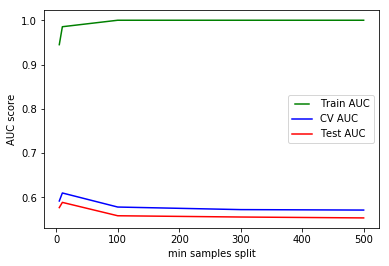

In [59]:
n_estimators_splits = [5, 10, 100, 300, 500]

train_results_tfidfww2v = []
cv_results_tfidfww2v = []
test_results_tfidfww2v = []

for n_estimators_split in n_estimators_splits:
    clf_dtree_tfidfww2v_nest = RandomForestClassifier(n_estimators=n_estimators_split)
    clf_dtree_tfidfww2v_nest.fit(train_tfidfww2v, y_train)
    
    train_pred_tfidfww2v = clf_dtree_tfidfww2v_nest.predict(train_tfidfww2v)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_tfidfww2v)
    roc_auc_train_tfidfww2v = auc(false_positive_rate, true_positive_rate)
    train_results_tfidfww2v.append(roc_auc_train_tfidfww2v)
    
    
    cv_pred_tfidfww2v = clf_dtree_tfidfww2v_nest.predict(cv_tfidfww2v)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, cv_pred_tfidfww2v)
    roc_auc_tfidfww2v_nest = auc(false_positive_rate, true_positive_rate)
    cv_results_tfidfww2v.append(roc_auc_tfidfww2v_nest)
    
    
    y_pred_tfidfww2v = clf_dtree_tfidfww2v_nest.predict(test_tfidfww2v)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_tfidfww2v)
    roc_auc_test_tfidfww2v = auc(false_positive_rate, true_positive_rate)
    test_results_tfidfww2v.append(roc_auc_test_tfidfww2v)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_splits, train_results_tfidfww2v, 'g', label="Train AUC")
line2, = plt.plot(n_estimators_splits, cv_results_tfidfww2v, 'b', label="CV AUC")
line3, = plt.plot(n_estimators_splits, test_results_tfidfww2v, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

In [60]:
print(train_results_tfidfww2v)
print("\n",cv_results_tfidfww2v)
print("\n",test_results_tfidfww2v)

[0.9448925533291196, 0.9853699064359268, 1.0, 1.0, 1.0]

 [0.5919669719641097, 0.6100243949519423, 0.5783009731356, 0.5724934436486594, 0.571468389733486]

 [0.5769957523332434, 0.5887906401642882, 0.5586105987641473, 0.5557643390792518, 0.5537427757369338]


In [61]:
test_results_hmap_tfidfww2v_2 = test_results_tfidfww2v
joblib.dump(test_results_hmap_tfidfww2v_2,"test_results_hmap_tfidfww2v_2.pkl")

['test_results_hmap_tfidfww2v_2.pkl']

In [62]:
test_results_hmap_tfidfww2v_2 = joblib.load("test_results_hmap_tfidfww2v_2.pkl")
test_results_hmap_tfidfww2v_2

[0.5769957523332434,
 0.5887906401642882,
 0.5586105987641473,
 0.5557643390792518,
 0.5537427757369338]

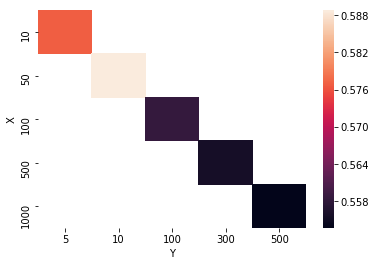

In [63]:
X = [10, 50, 100, 500, 1000]
Y = n_estimators_splits
Z = test_results_hmap_tfidfww2v_2
data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
data_pivoted = data.pivot("X", "Y", "Z")
ax = sns.heatmap(data_pivoted)
plt.show()

## Random Forest with best parameters on tfidfww2v

In [75]:
clf_rf_tfidfww2v_best = RandomForestClassifier(n_estimators=10, max_depth=1000)
clf_rf_tfidfww2v_best.fit(train_tfidfww2v, y_train)

rf_test_pred_tfidfww2v_best = clf_rf_tfidfww2v_best.predict(test_tfidfww2v)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_test_pred_tfidfww2v_best)
roc_auc_rf_tfidfww2v_best = auc(false_positive_rate, true_positive_rate)

joblib.dump(clf_rf_tfidfww2v_best,"clf_rf_tfidfww2v_best.pkl")
joblib.dump(rf_test_pred_tfidfww2v_best,"rf_test_pred_tfidfww2v_best.pkl")
joblib.dump(roc_auc_rf_tfidfww2v_best,"roc_auc_rf_tfidfww2v_best.pkl")

['roc_auc_rf_tfidfww2v_best.pkl']

In [76]:
clf_rf_tfidfww2v_best = joblib.load("clf_rf_tfidfww2v_best.pkl")
rf_test_pred_tfidfww2v_best = joblib.load("rf_test_pred_tfidfww2v_best.pkl")
roc_auc_rf_tfidfww2v_best = joblib.load("roc_auc_rf_tfidfww2v_best.pkl")
roc_auc_rf_tfidfww2v_best

0.6111991840952922

In [77]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_tfidfww2v = confusion_matrix(y_test, rf_test_pred_tfidfww2v_best)
cm_tfidfww2v

array([[  368,  1116],
       [  269, 10247]], dtype=int64)

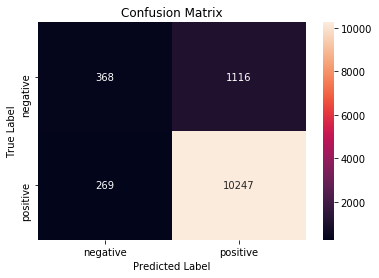

In [78]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
y_pred_train_tfidfww2v_proba = clf_rf_tfidfww2v_best.predict_proba(train_tfidfww2v)
y_pred_cv_tfidfww2v_proba = clf_rf_tfidfww2v_best.predict_proba(cv_tfidfww2v)
y_pred_test_tfidfww2v_proba = clf_rf_tfidfww2v_best.predict_proba(test_tfidfww2v)

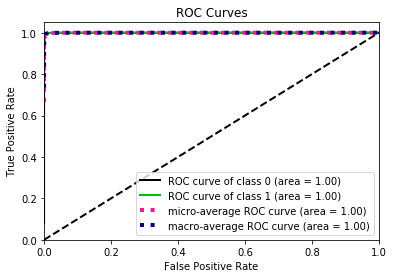

In [80]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_tfidfww2v_proba)

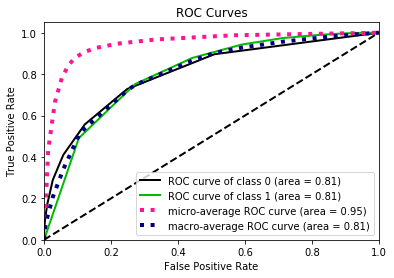

In [81]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_tfidfww2v_proba)

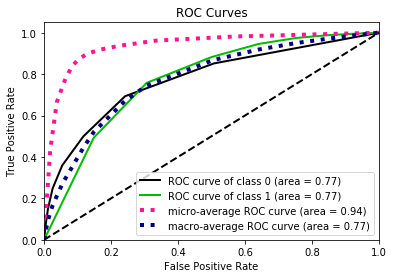

In [82]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_tfidfww2v_proba)

## Applying GBDT using XGBOOST on BoW

In [89]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_bow,y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [96]:
train_results = []
cv_results = []
test_results = []

train_pred = xgb_model.predict(train_bow)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
roc_auc_train = auc(false_positive_rate, true_positive_rate)
train_results.append(roc_auc_train)

cv_pred = xgb_model.predict(cv_bow)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred)
roc_auc_cv = auc(false_positive_rate, true_positive_rate)
cv_results.append(roc_auc_cv)
    
    
test_pred = xgb_model.predict(test_bow)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
roc_auc_test = auc(false_positive_rate, true_positive_rate)
test_results.append(roc_auc_test)

In [97]:
print(train_results)
print(cv_results)
print(test_results)

[0.5759853678217906]
[0.5677758659708726]
[0.5572382835448282]


In [102]:
# Confusion Matrix on Train Data
#y_pred = np.argmax(pred_test, axis=1)
cm_train_bow = confusion_matrix(y_train, train_pred)
cm_train_bow

array([[  648,  3585],
       [   38, 34129]], dtype=int64)

In [103]:
# Confusion Matrix on CV Data
#y_pred = np.argmax(pred_test, axis=1)
cm_cv_bow = confusion_matrix(y_cv, cv_pred)
cm_cv_bow

array([[ 156,  980],
       [  15, 8449]], dtype=int64)

In [104]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_test_bow = confusion_matrix(y_test, test_pred)
cm_test_bow

array([[  172,  1312],
       [   15, 10501]], dtype=int64)

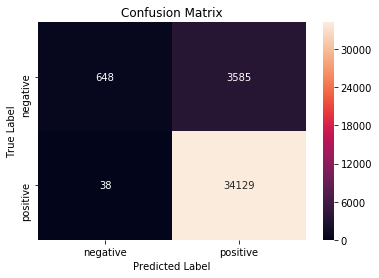

In [105]:
# plot confusion matrix to describe the performance of classifier for Train Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_train_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

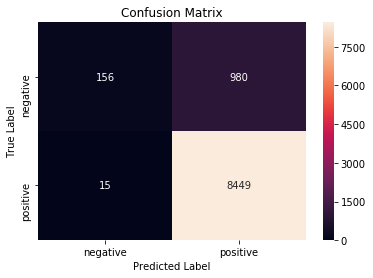

In [106]:
# plot confusion matrix to describe the performance of classifier for CV Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_cv_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

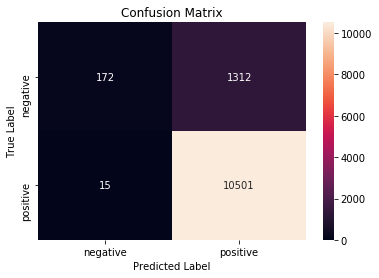

In [107]:
# plot confusion matrix to describe the performance of classifier for Test Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test_bow, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:
y_pred_train_proba = xgb_model.predict_proba(train_bow)
y_pred_cv_proba = xgb_model.predict_proba(cv_bow)
y_pred_test_proba = xgb_model.predict_proba(test_bow)

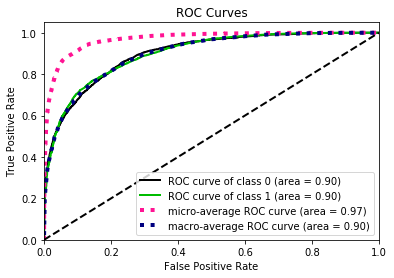

In [111]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba)

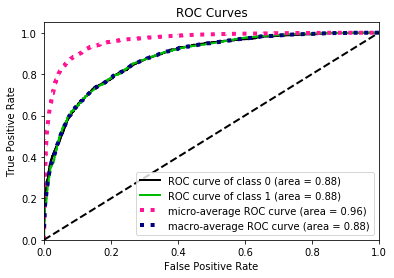

In [112]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba)

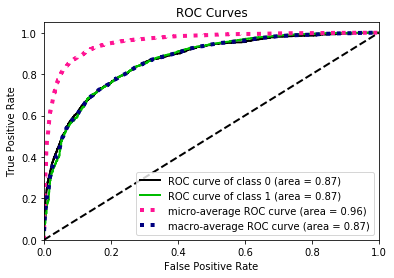

In [113]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba)

## Applying GBDT using XGBOOST on tfidf

In [114]:
xgb_model_tfidf = xgb.XGBClassifier()
xgb_model_tfidf.fit(train_tfidf,y_train)
xgb_model_tfidf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [115]:
train_results_tfidf = []
cv_results_tfidf = []
test_results_tfidf = []

train_pred_tfidf = xgb_model.predict(train_tfidf)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_tfidf)
roc_auc_train_tfidf = auc(false_positive_rate, true_positive_rate)
train_results_tfidf.append(roc_auc_train_tfidf)

cv_pred_tfidf = xgb_model.predict(cv_tfidf)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred_tfidf)
roc_auc_cv_tfidf = auc(false_positive_rate, true_positive_rate)
cv_results_tfidf.append(roc_auc_cv_tfidf)
    
    
test_pred_tfidf = xgb_model.predict(test_tfidf)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred_tfidf)
roc_auc_test_tfidf = auc(false_positive_rate, true_positive_rate)
test_results_tfidf.append(roc_auc_test_tfidf)

In [116]:
print(train_results_tfidf)
print(cv_results_tfidf)
print(test_results_tfidf)

[0.5730773289166231]
[0.5638736720892462]
[0.5578645913966037]


In [117]:
# Confusion Matrix on Train Data
#y_pred = np.argmax(pred_test, axis=1)
cm_train_tfidf = confusion_matrix(y_train, train_pred_tfidf)
cm_train_tfidf

array([[  624,  3609],
       [   43, 34124]], dtype=int64)

In [118]:
# Confusion Matrix on CV Data
#y_pred = np.argmax(pred_test, axis=1)
cm_cv_tfidf = confusion_matrix(y_cv, cv_pred_tfidf)
cm_cv_tfidf

array([[ 147,  989],
       [  14, 8450]], dtype=int64)

In [119]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_test_tfidf = confusion_matrix(y_test, test_pred_tfidf)
cm_test_tfidf

array([[  174,  1310],
       [   16, 10500]], dtype=int64)

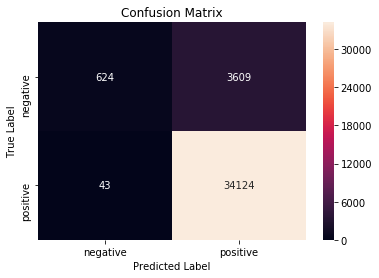

In [120]:
# plot confusion matrix to describe the performance of classifier for Train Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_train_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

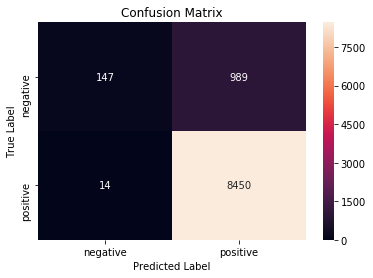

In [121]:
# plot confusion matrix to describe the performance of classifier for CV Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_cv_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

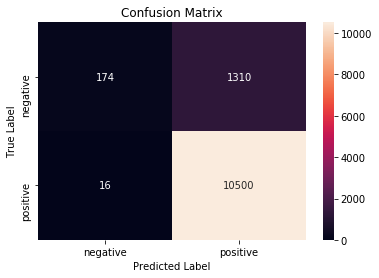

In [122]:
# plot confusion matrix to describe the performance of classifier for Test Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test_tfidf, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [123]:
y_pred_train_proba_tfidf = xgb_model_tfidf.predict_proba(train_tfidf)
y_pred_cv_proba_tfidf = xgb_model_tfidf.predict_proba(cv_tfidf)
y_pred_test_proba_tfidf = xgb_model_tfidf.predict_proba(test_tfidf)

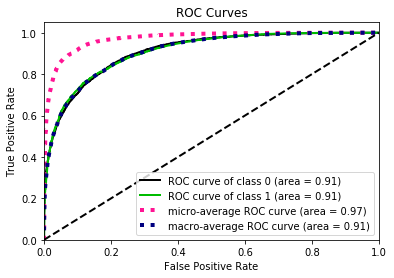

In [124]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_tfidf)

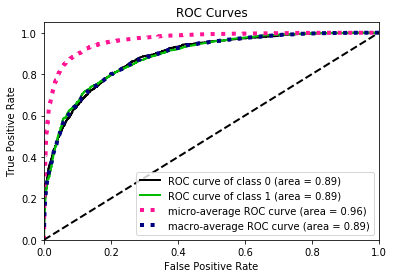

In [125]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba_tfidf)

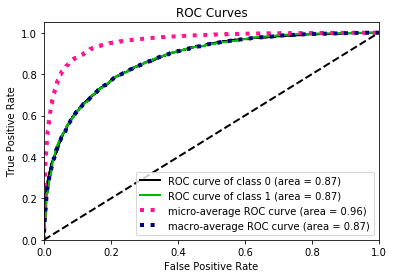

In [126]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_tfidf)

## Applying GBDT using XGBOOST on avgW2V

In [127]:
xgb_model_avgw2v = xgb.XGBClassifier()
xgb_model_avgw2v.fit(train_avgw2v,y_train)
xgb_model_avgw2v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [130]:
train_results_avgw2v = []
cv_results_avgw2v = []
test_results_avgw2v = []

train_pred_avgw2v = xgb_model_avgw2v.predict(train_avgw2v)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_avgw2v)
roc_auc_train_avgw2v = auc(false_positive_rate, true_positive_rate)
train_results_avgw2v.append(roc_auc_train_avgw2v)

cv_pred_avgw2v = xgb_model_avgw2v.predict(cv_avgw2v)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred_avgw2v)
roc_auc_cv_avgw2v = auc(false_positive_rate, true_positive_rate)
cv_results_avgw2v.append(roc_auc_cv_avgw2v)
    
    
test_pred_avgw2v = xgb_model_avgw2v.predict(test_avgw2v)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred_avgw2v)
roc_auc_test_avgw2v = auc(false_positive_rate, true_positive_rate)
test_results_avgw2v.append(roc_auc_test_avgw2v)

In [131]:
print(train_results_avgw2v)
print(cv_results_avgw2v)
print(test_results_avgw2v)

[0.6472502064265699]
[0.6277772970526372]
[0.6044302661891673]


In [132]:
# Confusion Matrix on Train Data
#y_pred = np.argmax(pred_test, axis=1)
cm_train_avgw2v = confusion_matrix(y_train, train_pred_avgw2v)
cm_train_avgw2v

array([[ 1288,  2945],
       [  334, 33833]], dtype=int64)

In [133]:
# Confusion Matrix on CV Data
#y_pred = np.argmax(pred_test, axis=1)
cm_cv_avgw2v = confusion_matrix(y_cv, cv_pred_avgw2v)
cm_cv_avgw2v

array([[ 304,  832],
       [ 102, 8362]], dtype=int64)

In [134]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_test_avgw2v = confusion_matrix(y_test, test_pred_avgw2v)
cm_test_avgw2v

array([[  329,  1155],
       [  135, 10381]], dtype=int64)

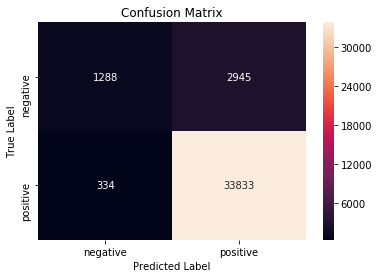

In [135]:
# plot confusion matrix to describe the performance of classifier for Train Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_train_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

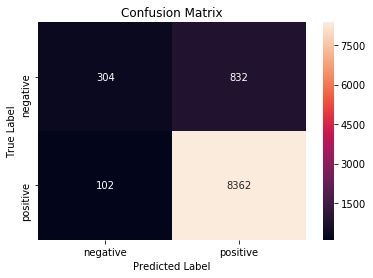

In [136]:
# plot confusion matrix to describe the performance of classifier for CV Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_cv_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

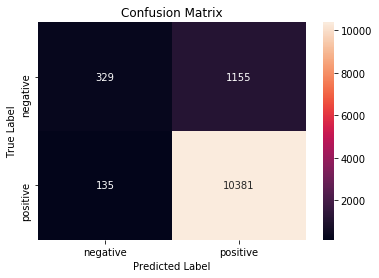

In [137]:
# plot confusion matrix to describe the performance of classifier for Test Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test_avgw2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [138]:
y_pred_train_proba_avgw2v = xgb_model_avgw2v.predict_proba(train_avgw2v)
y_pred_cv_proba_avgw2v = xgb_model_avgw2v.predict_proba(cv_avgw2v)
y_pred_test_proba_avgw2v = xgb_model_avgw2v.predict_proba(test_avgw2v)

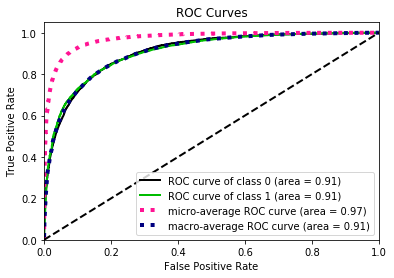

In [139]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_avgw2v)

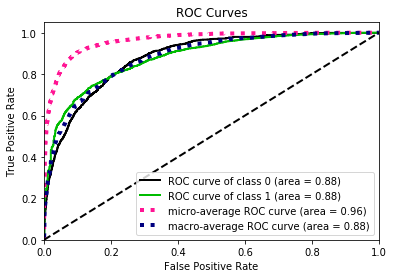

In [140]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba_avgw2v)

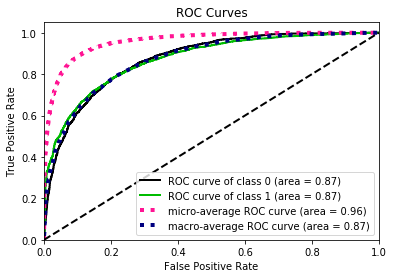

In [141]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_avgw2v)

## Applying GBDT using XGBOOST on tfidf-W-W2V

In [142]:
xgb_model_tfidfww2v = xgb.XGBClassifier()
xgb_model_tfidfww2v.fit(train_tfidfww2v,y_train)
xgb_model_tfidfww2v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [143]:
train_results_tfidfww2v = []
cv_results_tfidfww2v = []
test_results_tfidfww2v = []

train_pred_tfidfww2v = xgb_model_tfidfww2v.predict(train_tfidfww2v)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred_tfidfww2v)
roc_auc_train_tfidfww2v = auc(false_positive_rate, true_positive_rate)
train_results_tfidfww2v.append(roc_auc_train_tfidfww2v)

cv_pred_tfidfww2v = xgb_model_tfidfww2v.predict(cv_tfidfww2v)
    
false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_cv, cv_pred_tfidfww2v)
roc_auc_cv_tfidfww2v = auc(false_positive_rate, true_positive_rate)
cv_results_tfidfww2v.append(roc_auc_cv_tfidfww2v)
    
    
test_pred_tfidfww2v = xgb_model_tfidfww2v.predict(test_tfidfww2v)
    
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred_tfidfww2v)
roc_auc_test_tfidfww2v = auc(false_positive_rate, true_positive_rate)
test_results_tfidfww2v.append(roc_auc_test_tfidfww2v)

In [144]:
print(train_results_tfidfww2v)
print(cv_results_tfidfww2v)
print(test_results_tfidfww2v)

[0.6472502064265699]
[0.6277772970526372]
[0.6044302661891673]


In [145]:
# Confusion Matrix on Train Data
#y_pred = np.argmax(pred_test, axis=1)
cm_train_tfidfww2v = confusion_matrix(y_train, train_pred_tfidfww2v)
cm_train_tfidfww2v

array([[ 1288,  2945],
       [  334, 33833]], dtype=int64)

In [146]:
# Confusion Matrix on CV Data
#y_pred = np.argmax(pred_test, axis=1)
cm_cv_tfidfww2v = confusion_matrix(y_cv, cv_pred_tfidfww2v)
cm_cv_tfidfww2v

array([[ 304,  832],
       [ 102, 8362]], dtype=int64)

In [147]:
# Confusion Matrix on Test Data
#y_pred = np.argmax(pred_test, axis=1)
cm_test_tfidfww2v = confusion_matrix(y_test, test_pred_tfidfww2v)
cm_test_tfidfww2v

array([[  329,  1155],
       [  135, 10381]], dtype=int64)

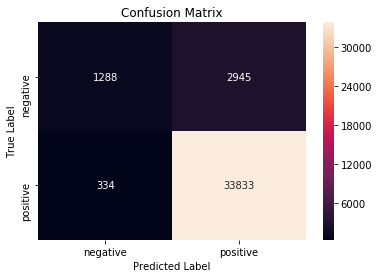

In [148]:
# plot confusion matrix to describe the performance of classifier for Train Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_train_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

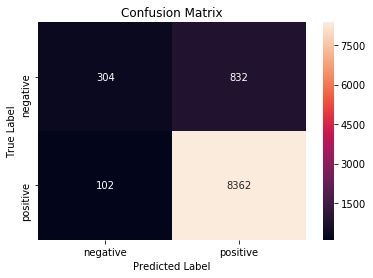

In [149]:
# plot confusion matrix to describe the performance of classifier for CV Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_cv_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

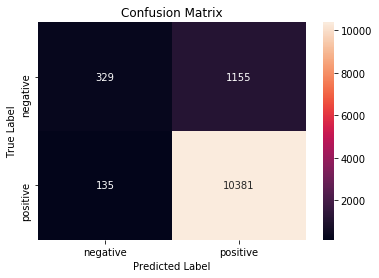

In [150]:
# plot confusion matrix to describe the performance of classifier for Test Data
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_test_tfidfww2v, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [151]:
y_pred_train_proba_tfidfww2v = xgb_model_tfidfww2v.predict_proba(train_tfidfww2v)
y_pred_cv_proba_tfidfww2v = xgb_model_tfidfww2v.predict_proba(cv_tfidfww2v)
y_pred_test_proba_tfidfww2v = xgb_model_tfidfww2v.predict_proba(test_tfidfww2v)

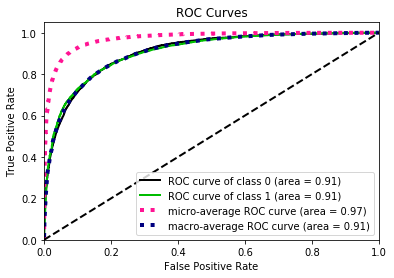

In [152]:
#Plotting ROC curve over Train Data
skplt.metrics.plot_roc_curve(y_train,y_pred_train_proba_tfidfww2v)

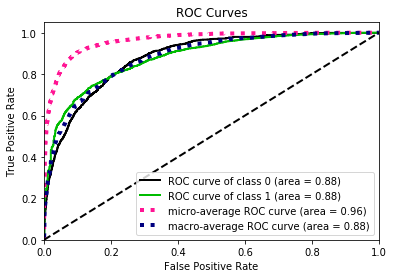

In [153]:
#Plotting ROC curve over CV Data
skplt.metrics.plot_roc_curve(y_cv,y_pred_cv_proba_tfidfww2v)

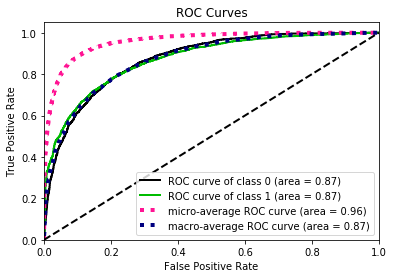

In [154]:
#Plotting ROC curve over Test Data
skplt.metrics.plot_roc_curve(y_test,y_pred_test_proba_tfidfww2v)

In [ ]:
for  importance,name in sorted(zip(clf_rf_best.feature_importances_,clf_rf_best.get_feature_names()))[-20:]:
    print(name," -->  ", importance)
xyz = clf_rf_best.feature_importances_
xyz

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
                'max_depth': [1, 5, 10, 50, 100, 500, 1000],
                'n_estimators': [5, 10, 100, 300, 500]}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = clf_rf, param_grid = param_grid, cv = 3)

# Fit the grid search to the data
grid_search_rf_fit = grid_search_rf.fit(train_bow, y_train)

joblib.dump(grid_search_rf_fit,"grid_search_rf_fit.pkl")